In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd

#read the csv file
df = pd.read_csv('/content/drive/MyDrive/Sleep.csv')

df.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                     'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate','sl':'stress level'}, inplace=True)

In [ ]:
print(df.head(20))

    snoring rate  respiration rate  body temperature  limb movement  \
0         93.800            25.680            91.840         16.600   
1         91.640            25.104            91.552         15.880   
2         60.000            20.000            96.000         10.000   
3         85.760            23.536            90.768         13.920   
4         48.120            17.248            97.872          6.496   
5         56.880            19.376            95.376          9.376   
6         47.000            16.800            97.200          5.600   
7         50.000            18.000            99.000          8.000   
8         45.280            16.112            96.168          4.224   
9         55.520            19.104            95.104          9.104   
10        73.440            21.344            93.344         11.344   
11        59.280            19.856            95.856          9.856   
12        48.600            17.440            98.160          6.880   
13    

In [ ]:
print(df.shape)
class_counts = df['stress level'].value_counts()
print(class_counts)

(5445, 9)
stress level
1.0    1466
2.0    1415
0.0    1198
3.0     918
4.0     448
Name: count, dtype: int64


In [ ]:
from os import X_OK
import numpy as np

# Prepare the data
x = df.drop('stress level', axis=1)
y = df['stress level']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca.shape)
print(X_test_pca.shape)

(4356, 5)
(1089, 5)


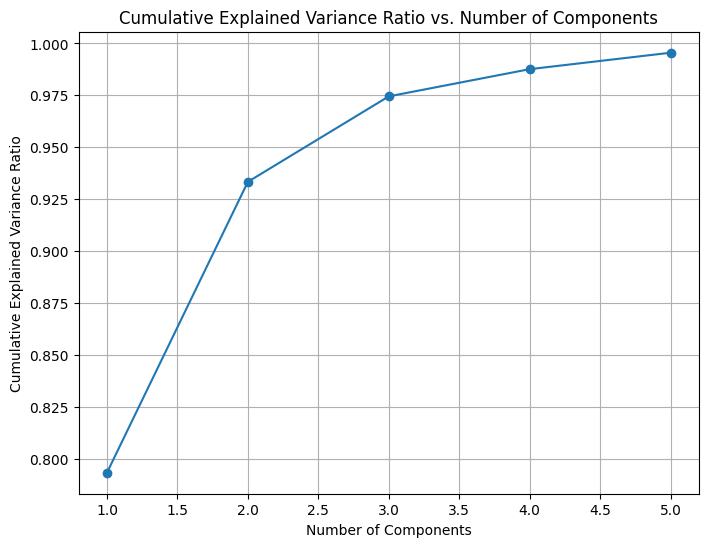

In [ ]:
# Plot the explained variance ratio
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


In [ ]:
# Perform cross-validation with different numbers of components
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for n_components in range(2, 9):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_train_pca, y_train, cv=5)
    print(f"Mean accuracy with {n_components} components:", scores.mean())

Mean accuracy with 2 components: 0.9409984305712088
Mean accuracy with 3 components: 0.9570695393884494
Mean accuracy with 4 components: 0.9584480561202456
Mean accuracy with 5 components: 0.957070592696363
Mean accuracy with 6 components: 0.9577589294178367
Mean accuracy with 7 components: 0.9595956350920064
Mean accuracy with 8 components: 0.9566105604651408


In [ ]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with different numbers of components
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_grid.fit(X_train_scaled, y_train)
print("Best parameters:", rf_grid.best_params_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
best_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
y_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9577594123048668
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       240
         1.0       0.94      0.95      0.94       295
         2.0       0.97      0.95      0.96       293
         3.0       0.96      0.97      0.96       167
         4.0       0.97      0.96      0.96        94

    accuracy                           0.96      1089
   macro avg       0.96      0.96      0.96      1089
weighted avg       0.96      0.96      0.96      1089



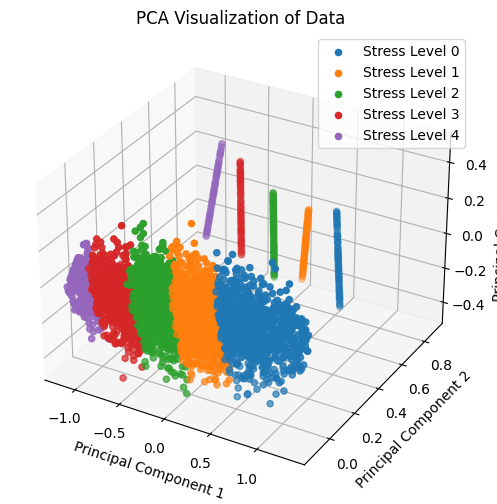

In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(5):
    ax.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], X_train_pca[y_train == i, 2], label=f'Stress Level {i}')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.title('PCA Visualization of Data')
plt.show()

In [ ]:
# List containing the values for the new data point
new_data_values = [48.1,17.2,97.8,6.4,96.2,72.4,8.2,53.1]
# Reshape the new_data_values to a 2D array with a single row
X_new_scaled = scaler.transform([new_data_values])  # Assuming 'scaler' is the MinMaxScaler used for training

# Make predictions
y_pred_new = best_rf.predict(X_new_scaled)

# 'y_pred_new' now contains the predicted stress level for the new data point
print("Predicted stress level for the new data point:", y_pred_new[0])


Predicted stress level for the new data point: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# List containing the values for the new data point
new_data_values = [96.2,26.2,85.3,17.1,82.4,100.3,0.0,75.7]
# Reshape the new_data_values to a 2D array with a single row
X_new_scaled = scaler.transform([new_data_values])  # Assuming 'scaler' is the MinMaxScaler used for training

# Make predictions
y_pred_new = best_rf.predict(X_new_scaled)

# 'y_pred_new' now contains the predicted stress level for the new data point
print("Predicted stress level for the new data point:", y_pred_new[0])


Predicted stress level for the new data point: 4.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# List containing the values for the new data point
new_data_values = [75.9,24.0,94.6,12.5,91.6,90.3,7.0,80.9]
# Reshape the new_data_values to a 2D array with a single row
X_new_scaled = scaler.transform([new_data_values])  # Assuming 'scaler' is the MinMaxScaler used for training

# Make predictions
y_pred_new = best_rf.predict(X_new_scaled)

# 'y_pred_new' now contains the predicted stress level for the new data point
print("Predicted stress level for the new data point:", y_pred_new[0])


Predicted stress level for the new data point: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
 # List containing the values for the new data point
new_data_values = [30.0,15.0,85.0,0.0,80.0,60.0,0.0,50.0]
# Reshape the new_data_values to a 2D array with a single row
X_new_scaled = scaler.transform([new_data_values])  # Assuming 'scaler' is the MinMaxScaler used for training

# Make predictions
y_pred_new = best_rf.predict(X_new_scaled)

# 'y_pred_new' now contains the predicted stress level for the new data point
print("Predicted stress level for the new data point:", y_pred_new[0])


Predicted stress level for the new data point: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# EXPORTING MODEL AND SCALING FOR INPUT


In [ ]:
import joblib

# Save the model and scaler
joblib.dump((best_rf, scaler), 'model_and_scaler.pkl')

# Load the model and scaler
best_rf, scaler = joblib.load('model_and_scaler.pkl')

# Use the loaded scaler to transform new data
X_new_scaled = scaler.transform([new_data_values])

# Make predictions
y_pred_new = best_rf.predict(X_new_scaled)

# Print the predicted stress level for the new data point
print("Predicted stress level for the new data point:", y_pred_new[0])


Predicted stress level for the new data point: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## PREDICTION

In [ ]:
import joblib

def prediction(input_data):
    # Load the model and scaler
    model, scaler = joblib.load('/content/model_and_scaler.pkl')
    # Transform the input data using the loaded scaler
    X_scaled = scaler.transform([input_data])
    # Make predictions
    prediction = model.predict(X_scaled)
    return prediction

input_data = [30.0, 15.0, 85.0, 0.0, 80.0, 60.0, 0.0, 50.0]
result = prediction(input_data)
print(result)


[0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
